<a href="https://colab.research.google.com/github/faheem-khaskheli/tensorflow_basics/blob/main/training_keras_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Model(object):
  def __init__(self):
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)
  
  def __call__(self, x):
    return self.w * x + self.b
  
model = Model()

In [ ]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [ ]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b

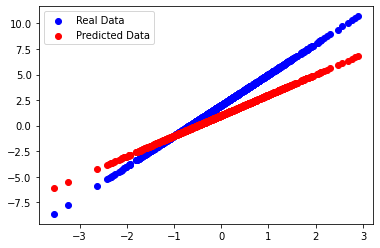

Current loss: 1.938138


In [ ]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b')
  predicted = plt.scatter(inputs, predicted_outputs, c='r')
  plt.legend((real, predicted), ('Real Data', 'Predicted Data'))
  plt.show()

plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

In [ ]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

In [ ]:
model = Model()

list_w, list_b = [], []
epochs = range(40)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, 
         list_w[-1], 
         list_b[-1], 
         current_loss))

Epoch  0: w=2.00 b=1.00, loss=1.93814
Epoch  1: w=2.19 b=1.20, loss=1.25875
Epoch  2: w=2.34 b=1.36, loss=0.81783
Epoch  3: w=2.46 b=1.49, loss=0.53157
Epoch  4: w=2.56 b=1.59, loss=0.34564
Epoch  5: w=2.64 b=1.68, loss=0.22484
Epoch  6: w=2.71 b=1.74, loss=0.14631
Epoch  7: w=2.76 b=1.79, loss=0.09525
Epoch  8: w=2.81 b=1.84, loss=0.06204
Epoch  9: w=2.84 b=1.87, loss=0.04042
Epoch 10: w=2.87 b=1.90, loss=0.02635
Epoch 11: w=2.90 b=1.92, loss=0.01718
Epoch 12: w=2.91 b=1.93, loss=0.01121
Epoch 13: w=2.93 b=1.95, loss=0.00731
Epoch 14: w=2.94 b=1.96, loss=0.00478
Epoch 15: w=2.95 b=1.97, loss=0.00312
Epoch 16: w=2.96 b=1.97, loss=0.00204
Epoch 17: w=2.97 b=1.98, loss=0.00133
Epoch 18: w=2.98 b=1.98, loss=0.00087
Epoch 19: w=2.98 b=1.99, loss=0.00057
Epoch 20: w=2.98 b=1.99, loss=0.00037
Epoch 21: w=2.99 b=1.99, loss=0.00024
Epoch 22: w=2.99 b=1.99, loss=0.00016
Epoch 23: w=2.99 b=1.99, loss=0.00010
Epoch 24: w=2.99 b=2.00, loss=0.00007
Epoch 25: w=2.99 b=2.00, loss=0.00005
Epoch 26: w=

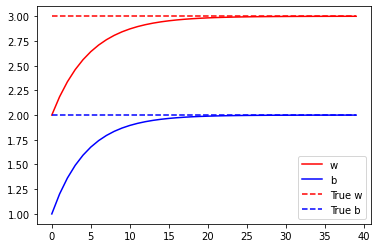

In [ ]:
plt.plot(epochs, list_w, 'r',
         epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

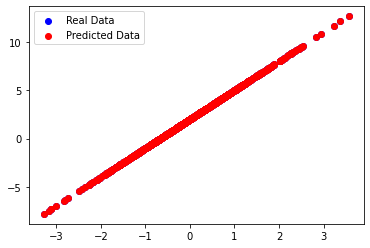

In [ ]:
test_inputs = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

In [ ]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel(['Loss'])

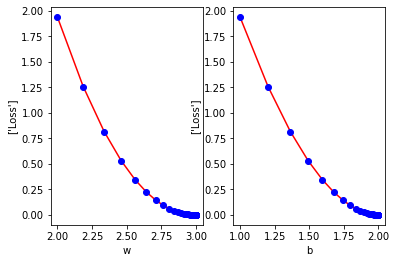

In [ ]:
weights_list = [{'name': 'w',
                 'values': list_w},
                {'name': 'b',
                 'values': list_b}]
            
plot_loss_for_weights(weights_list, losses)

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
train_data = tfds.load("fashion_mnist", split='train')
test_data = tfds.load("fashion_mnist", split='test')

def format_image(data):
  image = data["image"]
  image = tf.reshape(image, [-1])
  image = tf.cast(image, 'float32')
  image = image / 255.0
  return image, data["label"]

train_data = train_data.map(format_image)
test_data = test_data.map(format_image)

batch_size = 64
train = train_data.shuffle(buffer_size=1024).batch(batch_size)
test = test_data.batch(batch_size)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

In [ ]:
def base_model():
  inputs = tf.keras.Input(shape=(784,), 
                          name='clothing')
  x = tf.keras.layers.Dense(64, 
                            activation='relu', 
                            name='dense_1')(inputs)
  x = tf.keras.layers.Dense(64, 
                            activation='relu', 
                            name='dense_2')(x)
  outputs = tf.keras.layers.Dense(10, 
                                  activation='softmax', 
                                  name='predictions')(x)
  model = tf.keras.Model(inputs=inputs, 
                         outputs=outputs)
  return model

In [ ]:
def apply_gradient(optimizer, model, x, y):
  with tf.GradientTape() as tape:
    y_pred = model(x)
    loss_value = loss_object(y_true=y, y_pred=y_pred)
    gradients = tape.gradient(loss_value, model.trainable_weights)
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))
  return y_pred, loss_value

In [ ]:
 def train_data_for_one_epoch():
  losses = []
  for step, (x_batch, y_batch) in enumerate(train_dataset):
    logits, loss_value = apply_gradient(optimizer, 
                                        model, 
                                        x_batch, 
                                        y_batch)
    losses.append(loss_value)
  return losses

In [ ]:
model = base_model()
epochs = 20
for epoch in range(epochs):

  losses_train = train_data_for_one_epoch()

  losses_val = perform_validation()

  losses_train_mean = np.mean(losses_train)
  losses_val_mean = np.mean(losses_val)

In [ ]:
def apply_gradient(optimizer, model, X_batch, y_batch):
  with tf.GradientTape() as tape:
    y_pred  = model(x_batch)
    loss = loss_object(y_batch, y_pred)
  grad = tape.gradient(loss, y_batch)
  optimizer.apply_gradients(zip(grad), model.trainable_variables)
  return y_pred, loss